# 자, Neural Network를 만들어봅시다.
## 우리가 만들 network는 3-layer Feed forward Fully Connected Neural Network입니다.

- <span style = 'font-size:1.2em;line-height:1.5em'><b>input layer:</b> 784 neurons(MNIST 데이터는 28*28 pixel로 되어있고, 이를 쭉 펼치면 784차원이 됩니다.)</span>
- <span style = 'font-size:1.2em;line-height:1.5em'><b>1st hidden layer:</b> 50 neurons</span>
- <span style = 'font-size:1.2em;line-height:1.5em'><b>2nd hidden layer:</b> 100 neurons</span>
- <span style = 'font-size:1.2em;line-height:1.5em'><b>output layer:</b> 10 neurons (0~9까지의 숫자가 있기 때문에, 총 10개의 클래스)</span>

## 미리 학습해둔 weight를 불러오겠습니다.
- <span style = 'font-size:1.2em;line-height:1.5em'>미리 학습한 weight파일은 sample_weights 폴더안에 sample_weight.pkl이라는 파일로 저장되어 있습니다.</span>
- <span style = 'font-size:1.1em;line-height:1.3em'>(출처: https://github.com/WegraLee/deep-learning-from-scratch)</span>


In [2]:
import numpy as np
import pickle

In [3]:
import pickle
# pkl확장자의 파일은 다음과 같은 방식으로 열 수 있습니다!
with open("sample_weights/sample_weight.pkl","rb") as f:
    network = pickle.load(f)

In [4]:
# sample_weight라는 파일에는 dictionary가 저장되어 있네요!
type(network)

dict

In [5]:
# dictionary에 뭐가 들어있는지 볼까요?
for key, value in network.items():
    print(f"{key}'s shape: {value.shape}, type: {type(value)}")

b2's shape: (100,), type: <class 'numpy.ndarray'>
W1's shape: (784, 50), type: <class 'numpy.ndarray'>
b1's shape: (50,), type: <class 'numpy.ndarray'>
W2's shape: (50, 100), type: <class 'numpy.ndarray'>
W3's shape: (100, 10), type: <class 'numpy.ndarray'>
b3's shape: (10,), type: <class 'numpy.ndarray'>


## 이제 하나의 MNIST 데이터에 대해서 forward propagation해보겠습니다.

In [6]:
# mnist.py에서 우리가 실제로 사용할 load_mnist함수만 불러올게요
from mnist import load_mnist

In [7]:
(x_trn, y_trn), (x_tst, y_tst) = load_mnist(flatten=True, normalize=False)

In [9]:
x_trn[0].shape

(784,)

In [11]:
idx = 0
x_sample = x_trn[idx].reshape(1,-1)
y_sample = y_trn[idx].reshape(1,-1)

In [12]:
x_sample.shape

(1, 784)

In [8]:
from act_func import *

In [9]:
W1, W2, W3 = network['W1'], network['W2'], network['W3']
b1, b2, b3 = network['b1'], network['b2'], network['b3']

a1 = np.dot(x_sample, W1)+b1
z1 = sigmoid(a1)
a2 = np.dot(z1, W2)+b2
z2 = sigmoid(a2)
a3 = np.dot(z2,W3)+b3
a3 = softmax(a3)

/Users/jimin/Library/CloudStorage/GoogleDrive-shwlals96@gmail.com/내 드라이브/KMU/4학년 1학기/딥러닝/과제/deeplearning/[Lab]Week03/act_func.py:27: RuntimeWarning: overflow encountered in exp
  result = 1/(1+np.exp(-x))


## 0번째 데이터에 대해서 NN의 output값은 다음과 같습니다.

In [10]:
a3

array([[1.1443588e-03, 2.0609930e-05, 1.0901098e-05, 5.6976795e-02,
        4.4489605e-07, 9.4075352e-01, 7.9904919e-07, 2.3371121e-04,
        6.7104248e-04, 1.8777004e-04]], dtype=float32)

## softmax값이 최대인 class로 분류합니다. NN은 어느 class로 분류했을까요?

In [11]:
np.argmax(a3)

5

## 실제값과 비교하면 어떨까요?

In [12]:
print(y_sample)

[[5]]


## 자, 그럼 이제 60000개의 데이터에 대해서 NN의 모든 output을 계산해보죠

In [13]:
result = []
for i in range(x_trn.shape[0]):
    x_sample = x_trn[i]
    a1 = np.dot(x_sample, W1)+b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2)+b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2,W3)+b3
    a3 = softmax(a3)
    
    result.append(np.argmax(a3))
result = np.array(result)

In [14]:
result

array([5, 0, 4, ..., 5, 6, 8])

## 정확도는 얼마나 될까요?

In [15]:
np.sum(result == y_trn)

55511

In [16]:
print(f'미리 학습한 모델의 정확도는 {100*np.sum(result==y_trn) / len(y_trn):.2f}%입니다.')

미리 학습한 모델의 정확도는 92.52%입니다.


## 몇번째 데이터에서 틀렸으며, 그 데이터의 실제값과 예측값은 뭘까요?

In [17]:
print(np.argwhere(result!=y_trn))
print(result[result != y_trn])
print(y_trn[result!=y_trn])

[[   24]
 [   48]
 [   70]
 ...
 [59915]
 [59919]
 [59934]]
[3 3 2 ... 7 8 7]
[1 9 1 ... 4 1 0]


In [18]:
print(len(np.argwhere(result!=y_trn)))

4489


## 틀린 녀석들은 어떻게 생겼길래 틀렸을까요? 한번 그려봅시다

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

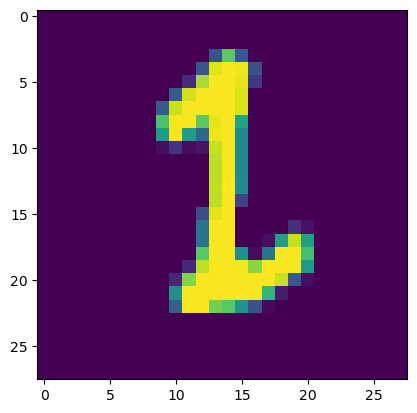

In [20]:
plt.imshow(x_trn[70].reshape(28,28))